In [27]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

import seaborn as sns

In [14]:
data = pd.read_csv('Botnet-Training-Short.csv')
X_train = data.drop('Malware', axis=1)
y_train = data['Malware']
data = pd.read_csv('Botnet-Testing-Short.csv')
X_test = data.drop('Malware', axis=1)
y_test = data['Malware']
data = pd.read_csv('Botnet-test-with-iscx-Short.csv')
X_test_iscx = data.drop('Malware', axis=1)
y_test_iscx = data['Malware']

In [15]:
forest = RandomForestClassifier()

С перебором гиперпараметров

In [31]:
param_dist = {
        "n_estimators": randint(10, 100),
        "max_depth": randint(1, 20),
        "min_samples_split": randint(2, 11),
        "min_samples_leaf": randint(1, 11),
        "max_features": ["auto", "sqrt", "log2"]
    }

rand_search = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)
rand_search.fit(X_train, y_train)
best_forest = rand_search.best_estimator_

In [32]:
best_forest.fit(X_train, y_train)
y_pred1 = best_forest.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred1)
report = classification_report(y_test, y_pred1)
print("Accuracy:", accuracy)
print(matrix)
print(report)

Accuracy: 0.8699143824251676
[[21953  1090]
 [ 2830  4261]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     23043
           1       0.80      0.60      0.68      7091

    accuracy                           0.87     30134
   macro avg       0.84      0.78      0.80     30134
weighted avg       0.86      0.87      0.86     30134



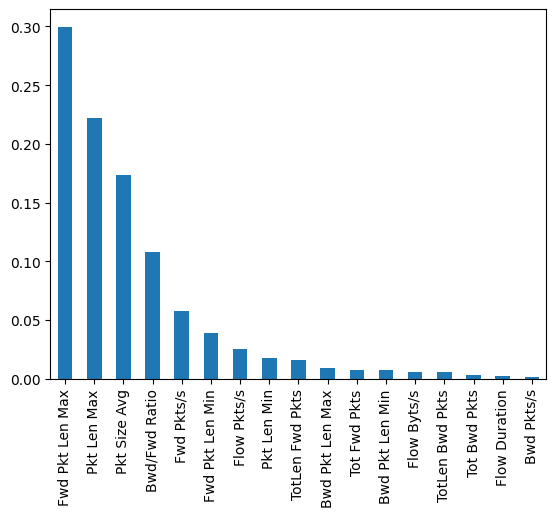

In [ ]:
feature_importances = pd.Series(best_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.show()

Без перебора гиперпараметров

In [16]:
forest.fit(X_train, y_train)
y_pred2 = forest.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred2)
matrix = confusion_matrix(y_test, y_pred2)
report = classification_report(y_test, y_pred2)
print("Accuracy:", accuracy)
print(matrix)
print(report)

Accuracy: 0.8759540718125706
[[21658  1385]
 [ 2353  4738]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     23043
           1       0.77      0.67      0.72      7091

    accuracy                           0.88     30134
   macro avg       0.84      0.80      0.82     30134
weighted avg       0.87      0.88      0.87     30134



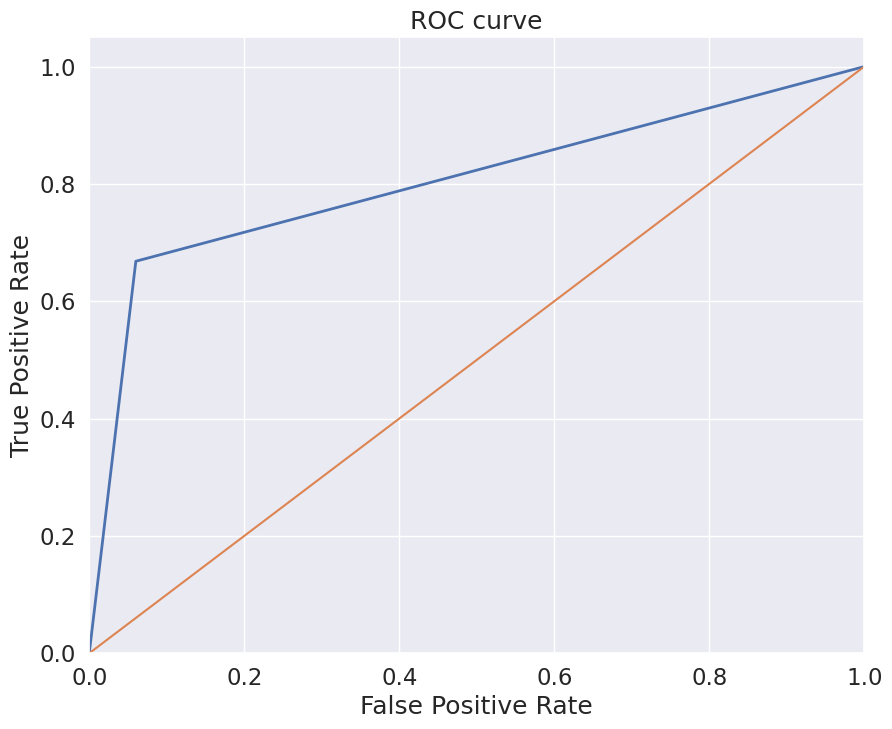

In [30]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

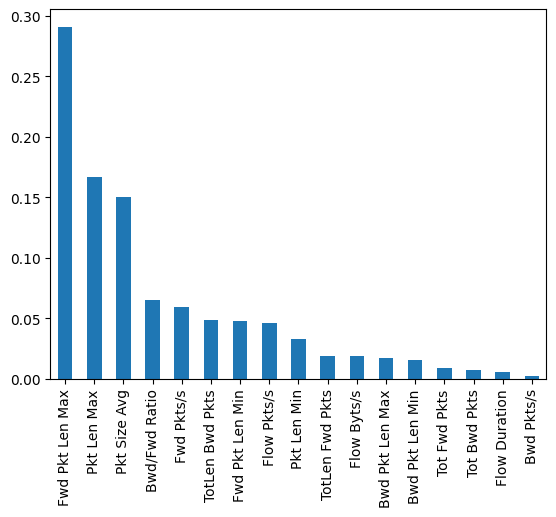

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.show()